# Example 2. Model selections
---
The parameter optimization is also called **model selection**. The model selection has to be achive by applying validation method to find the best one. The simple method to validate and compare the models is using **validation curve**. By choosing different parameter of certain learning method, e.g. the regularization parameter of the logstic regression method, we can observe the changing scores of training and validation data. Of cource, the obtained scores are taken from the average reault of **Stratified k-fold cross-validation** method.  

The more advance model selection method are **Grid search** and **Nested cross-validation**. The first method is using *brute-force* algorithm to fine tune the best combination of parameters. It does cost the computing resource but usually can have good choise. The second is use the 2 layer of **Stratified k-fold cross-validation** to have training, validation and test folds. The idea can be illustracted as ![nested-k-fold](../doc/nested-k-fold.png)


(Picture creadited by [https://sebastianraschka.com/faq/docs/evaluate-a-model.html](https://sebastianraschka.com/faq/docs/evaluate-a-model.html))
- Introduce **validation curve** to find the proper parameter value.
- Perform simple case of parameter tuning in **regularization parameter**.
- Fine tuning the parameter with **Grid search**
- Introduce the combination way of optimation and validation for choosing the model, called **Nested cross-validation**.

The data is using [breast cancer of Wisconsin](http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data)


### Import packages and data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing   import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('../data/wdbc.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y) 
np.unique(y)
# 1: M (have cancer), 0: B (without cancer)

array([0, 1])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 1. Validation curve V.S. Regularization parameter

We have seen the regularization which was introduced at [Chapter 4/Example 2](../Chapter_04/example_02_Regularization) for solving the overfitting problem. The **regularization parameter** $C=\frac{1}{\lambda}$ can be customized for the strength of regularization in the different cases. In general, the regularized cost function, $J$, can be written as 

$$
\begin{equation}
J=J_0+\frac{1}{C}\sum_{i}{||\mathbf{w}_i||^p}\ ,
\end{equation}
$$

where $J_0$ is the unregularized cost function; and $p$ is the order of weights, e.g. **L1 regularization** is $p=1$, and **L2 regularization** is $p=2$. When $C$ is increasing, we are minimizing $J_0$ rather than regularization term. When $C$ is decreasing, we are minimizing the weights to make them as small as possible directly. However, the proper parameter is unknow for each case, we have to validate for each possible value. There is a simple way to observe the behavior of regularization parameter, it is **validation curve**. It simply gives the different values of $C$ and compares training and test data for validation. Each accuracy correspoding to each $C$ is also obtained by **k-fold cross-validation** to aviod the measurment bias.

In [5]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model    import LogisticRegression

In [6]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('clf', LogisticRegression(penalty='l2', random_state=0))])

In [7]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr, 
                                             X=X_train, 
                                             y=y_train, 
                                             param_name='clf__C', 
                                             param_range=param_range, 
                                             cv=10)

In [8]:
train_mean, train_std = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
test_mean,  test_std  = np.mean(test_scores, axis=1),  np.std(test_scores, axis=1)

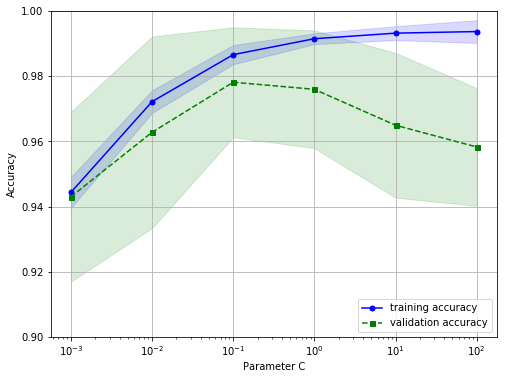

In [9]:
plt.figure(figsize=(8,6))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(param_range,  test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.9, 1.0])
plt.show()

### 2. Fine tuning with Grid search 

The alternative ways to probe the optimized parameter is **Grid search** and **Random search**. The **Grid search** is a brute-force type algorithm to find the best combination of the given free parameters. Since it is a brute-force, the computing resource cost a lots. The another way, **Random search**, is to randomly choose the combination of the given free parameters under the limited customized budget. Here we only shows **Grid search** to have optimized model.

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm             import SVC

In [11]:
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('clf', SVC(random_state=1))])

In [12]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = [{'clf__C':param_range, 'clf__kernel':['linear']},
              {'clf__C':param_range, 'clf__kernel':['rbf'], 'clf__gamma':param_range}]
## Same results with following
#param_grid = [{'clf__C':param_range, 'clf__kernel':['rbf','linear'], 'clf__gamma':param_range}]

In [13]:
gs = GridSearchCV( estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
gs = gs.fit(X_train, y_train)

In [14]:
print 'The best score: %.3f'% gs.best_score_
print 'The best parametes: ', gs.best_params_

The best score: 0.978
The best parametes:  {'clf__C': 0.1, 'clf__kernel': 'linear'}


In [15]:
clf = gs.best_estimator_
print 'Test accuracy: %.3f'% clf.score(X_test, y_test)

Test accuracy: 0.965


### 3. Nested cross-validation

Sometime we have two or even more model on the hands without significant information to choose. There is a general way to scan the models for finding a proper one. The method combine the optimization and validation with ***inner*** and ***ourter fold*** of **k-fold cross-validation**, it is called **Nested cross-validation**. The ***inner fold*** is splited *validation* and *training* dataset for tuning parameter from *training* dataset of ***outer fold***. The ***outer fold*** is split to *training* and *test* fold for validating the accuracy. In the case with 5 outer fold and 2 inner fold, we usually also call it *5x2 cross-validation*. Here we can also simply use the packages from ***scikit-learn*** to achive the method with *10x5 cross-validation* method. The example in following is comparing two different model for validating the fit model.

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [17]:
scores = {}
# Inner fold setting (parameter tuning)
gs_svc  = GridSearchCV( estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
gs_tree = GridSearchCV( estimator=DecisionTreeClassifier(random_state=0), 
                        param_grid=[{'max_depth':[1,2,3,4,5,6,7,None]}], 
                        scoring='accuracy', cv=5)
# Outer fold setting (accuracy validation)
scores['svc'] =cross_val_score(gs_svc,  X_train, y_train, scoring='accuracy', cv=10); print '[DONE] SVC fit'
scores['tree']=cross_val_score(gs_tree, X_train, y_train, scoring='accuracy', cv=10); print '[DONE] Tree fit'

[DONE] SVC fit
[DONE] Tree fit


In [18]:
print 'SVC  accuracy (cv): %.3f +/- %.3f'%( np.mean(scores['svc']),  np.std(scores['svc']))
print 'Tree accuracy (cv): %.3f +/- %.3f'%( np.mean(scores['tree']), np.std(scores['tree']))

SVC  accuracy (cv): 0.976 +/- 0.023
Tree accuracy (cv): 0.948 +/- 0.038


From above test with **Nested cross-validation**, we find the SVM model has better accuracy than decision tree.